# DSCI 632 Final
## Rushikesh Bhavesh Gholap
## rg954@drexel.edu
## 14657883
Your final is to use the dataset of your choice and the techniques in this class to do the following:

1. Define and describe the dataset (10 points)
1. Clean the data (10 points)
1. Transform the clean data (10 points)
1. Show your analysis of the data (10 points)

## Ground Rules

1. Explain everything you're doing with pyspark in the code cells using [markdown](https://www.markdownguide.org/cheat-sheet) in text cells. Help the reader understand why you're doing each step so they can re-create it. Remember, this is an assignment to show how you analyze data to a potential employer. Don't use code comments to explain things.
1. All of the sections are heading 1 in markdown, so use heading 2 to write your explainations, and heading 3 for any sub-headers. Check in your table of contents view in colab to make sure each point is listed before you turn this in.
1. Don't hesisate to use multiple code/text cells in each section, as long as they're all labeled and described.
1. Assume that the reader doesn't have access to the dataset on your local machine. Provide a link to the dataset you're using, or if able, include code to copy it from a public source. Don't rely on uploading from your local machine. (Importing from Google Drive is ok, as long as you provide the link to the data)
1. If using GCP services, include screenshots from your console if there's a step that you aren't able to re-produce in code. Using the SDK is always preferred, but you won't lose points for using screenshots and explaining them.
1. Import the data ONCE, then transform it to fit your analysis.
1. Don't overwrite data, make new columns for new transformations. You can always drop columns later, but you can't get overwritten values back.
1. Feel free to work with classmates, but all work submitted must be your own.
1. Make sure to run disconnect the runtime and re-run the notebook at least once before turning in. If you are getting certain Java runtime errors, this might also help.

## Extra Credit Opportunities!

- If you provide a link to this notebook on your public GitHub page instead of turning it in as an attachment, you will get 2 points extra credit.
- Extra credit will be given for using the [Google Cloud SDK](https://cloud.google.com/sdk/) to create/use/destroy any cloud resources, up to 2 points per section, 8 points total.
 - Don't be afraid to look at the GCP example colab notebooks from the class notes, the GCP documentation, or GitHub for examples.
- If this notebook is self-contained, you will get 5 points extra credit. (Requirements below)
 - The data is imported without relying on Google Drive, as the paths to data in Google Drive are user-specific. Downloads from public storage buckets/services are fine. (1 point)
 - It be run from start to finish without making any changes to paths, code, or variable names. (1 point)
 - All calls to external services, including GCP, are done programatically, no screenshots explaining how it worked in a browser console. (Using an API or SDK, 2 points)
 - All cloud resources are destroyed at the end of the notebook in a seperate section (Also via API or SDK, 1 point)

# Section 1: Define and describe the dataset

10 points

Import the dataset, and describe why you'll be analyzing in it. You can summarize a few columns, show a more information on the relavent features, or but help the reader understand what the dataset is, what is in it, and why you picked it.

Some questions that it might help you to answer:
1. Why are you choosing this dataset?
1. What variables will you use?
1. What analysis(es) will you run?
1. Do you have any hypotheses? What are they?

### This section should include one or more of the following:
- A histogram of several features relavent to your analysis
- The schema of the dataset, with the datatypes assigned correctly
- A text cell with explainations of the relavent features in [markdown](https://www.markdownguide.org/cheat-sheet)
- Use Spark SQL or built-in methods to show a range of values
- Most common words/n-grams found

**Installation of Pyspark for collab**


In [1]:
# Install Spark 3.5.0
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.5.0/spark-3.5.0-bin-hadoop3.tgz
!tar xf spark-3.5.0-bin-hadoop3.tgz

# Set Environment Variables
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.5.0-bin-hadoop3"

# Install Findspark
!pip install -q findspark

import findspark
findspark.init()



In [2]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("RG_PROJECT").getOrCreate()


**Loading Dataset**

**Info about Data:**

The **diabetes_prediction_dataset.csv** file contains medical and demographic data of patients along with their diabetes status, whether positive or negative. It consists of various features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level. The Dataset can be utilized to construct machine learning models that can predict the likelihood of diabetes in patients based on their medical history and demographic details.

Why this data? ▶

1.   Relevance: Diabetes is a prevalent chronic condition globally, and having
accurate predictive models can aid in early detection and intervention.
2.   Potential Impact: Predictive models derived from this dataset can potentially assist healthcare providers in identifying individuals at risk of diabetes and implementing preventive measures.

3. Rich Feature Set: The dataset encompasses a variety of medical and demographic features, providing a comprehensive basis for building predictive models.

What analysis(es) will you run? ▶

1. Exploratory Data Analysis (EDA): Understand the distribution and relationships between variables, identify any patterns or correlations.

2. Feature Engineering: Transform or derive new features if necessary to enhance predictive power.

3. Model Building: Utilize machine learning algorithms to build predictive models for diabetes risk.

4. Model Evaluation: Assess the performance of the models using appropriate evaluation metrics such as accuracy, precision, recall, and F1 score.

**Hypotheses?** ▶

1. Age Hypothesis: Older individuals are more likely to have diabetes compared to younger individuals.

2. BMI Hypothesis: Higher BMI is positively correlated with diabetes risk.

3. Gender Hypothesis: There may be gender-based differences in diabetes prevalence, with males or females having a higher risk.

4. HbA1c Hypothesis: Higher HbA1c levels are associated with an increased likelihood of diabetes.

5. Blood Glucose Level Hypothesis: Elevated fasting blood glucose levels are indicative of diabetes risk.


In [23]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
import requests

url = "https://raw.githubusercontent.com/RushikeshGholap/DSCI_632_Project/main/diabetes_prediction_dataset.csv"

response = requests.get(url)
with open("diabetes_prediction_dataset.csv", "wb") as f:
    f.write(response.content)

diabetes_df = spark.read.csv("diabetes_prediction_dataset.csv", header=True, inferSchema=True)

diabetes_df.printSchema()
diabetes_df.show(5)


root
 |-- gender: string (nullable = true)
 |-- age: double (nullable = true)
 |-- hypertension: integer (nullable = true)
 |-- heart_disease: integer (nullable = true)
 |-- smoking_history: string (nullable = true)
 |-- bmi: double (nullable = true)
 |-- HbA1c_level: double (nullable = true)
 |-- blood_glucose_level: integer (nullable = true)
 |-- diabetes: integer (nullable = true)

+------+----+------------+-------------+---------------+-----+-----------+-------------------+--------+
|gender| age|hypertension|heart_disease|smoking_history|  bmi|HbA1c_level|blood_glucose_level|diabetes|
+------+----+------------+-------------+---------------+-----+-----------+-------------------+--------+
|Female|80.0|           0|            1|          never|25.19|        6.6|                140|       0|
|Female|54.0|           0|            0|        No Info|27.32|        6.6|                 80|       0|
|  Male|28.0|           0|            0|          never|27.32|        5.7|                15

Above is the dataset schema and  few sample rows.

Schema details

*  gender: String - Gender of the individual.

*  age: Double - Age of the individual in years.

*  hypertension: Integer - Presence (1) or absence (0) of hypertension.

*  heart_disease: Integer - Presence (1) or absence (0) of heart disease.

*  smoking_history: String - Smoking history categorized as "never," "current," or possibly "No Info."

*  bmi: Double - Body Mass Index (BMI) of the individual.

*  HbA1c_level: Double - Hemoglobin A1c (HbA1c) level indicating long-term blood sugar control.

*  blood_glucose_level: Integer - Fasting blood glucose level, a diagnostic criterion for diabetes.

*  diabetes: Integer - Diabetes status, 1 for positive (diabetic) and 0 for negative (non-diabetic).



# Section 2: Clean the data

10 points

Not every dataset is going to be ready to use right away. Take steps to fix incorrect inputs, remove null values, and assign datatypes that fit each feature.

### This section should include one or more of the following:
- A count of rows before and after dropping data with null or incorrect values, including an explaination of why removing the rows was necessary in [markdown](https://www.markdownguide.org/cheat-sheet).
- Renaming a column, adding a new one, or casting an existing one as a different datatype.
- Remove punctuation marks, symbols, etc from the data, and convert all upper-case lettering to lower-case.
- Remove or fix rows that have bad values/data.

## **Analytics, insights and Hypotheses**





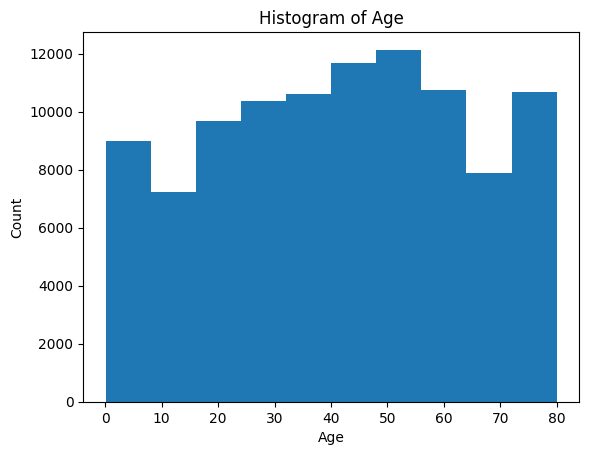

In [27]:
age_data = diabetes_df.select('age').rdd.flatMap(lambda x: x).histogram(10)

import matplotlib.pyplot as plt

bins, counts = age_data

plt.hist(bins[:-1], bins=bins, weights=counts)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram of Age')
plt.show()



The histogram above show distribution that closely resembles a normal distribution, albeit with a slight left skew. Notably, there is a peak observed at the age of 80. This peak is likely a result of data collection processes wherein ages exceeding 80 were capped and represented as "80+". As a consequence, the distribution appears slightly peaked at the age of 80.


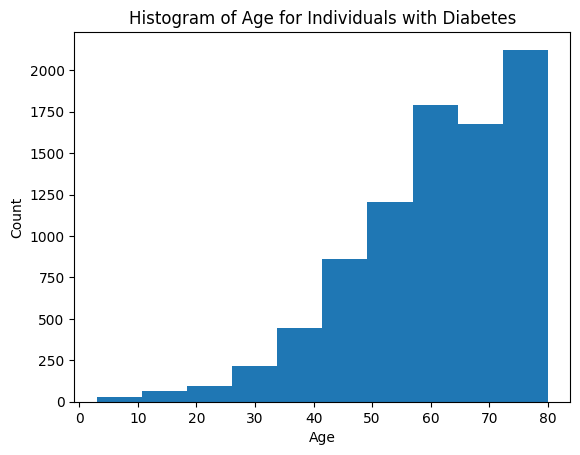

In [28]:
age_data_diabetes = diabetes_df.filter(diabetes_df.diabetes == 1).select('age').rdd.flatMap(lambda x: x).histogram(10)

import matplotlib.pyplot as plt

bins_diabetes, counts_diabetes = age_data_diabetes

plt.hist(bins_diabetes[:-1], bins=bins_diabetes, weights=counts_diabetes)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram of Age for Individuals with Diabetes')
plt.show()

*its clear as age increases, the likelihood of being diagnosed with diabetes also rises.







In [25]:
zdiabetes_df.groupBy('gender').count().show()
diabetes_df.groupBy('hypertension').count().show()
diabetes_df.groupBy('heart_disease').count().show()
diabetes_df.groupBy('smoking_history').count().show()
diabetes_df.groupBy('diabetes').count().show()





+------+-----+
|gender|count|
+------+-----+
|Female|58552|
| Other|   18|
|  Male|41430|
+------+-----+

+------------+-----+
|hypertension|count|
+------------+-----+
|           1| 7485|
|           0|92515|
+------------+-----+

+-------------+-----+
|heart_disease|count|
+-------------+-----+
|            1| 3942|
|            0|96058|
+-------------+-----+

+---------------+-----+
|smoking_history|count|
+---------------+-----+
|    not current| 6447|
|         former| 9352|
|        No Info|35816|
|        current| 9286|
|          never|35095|
|           ever| 4004|
+---------------+-----+

+--------+-----+
|diabetes|count|
+--------+-----+
|       1| 8500|
|       0|91500|
+--------+-----+



Gender Distribution:
*  The dataset consists of significantly more females (58,552) than males (41,430), with a small number categorized as "Other" (18).

Hypertension and Heart Disease:
* Most individuals in the dataset do not have hypertension (92,515) or heart disease (96,058), compared to those who do (hypertension: 7,485, heart disease: 3,942).

Smoking History:
* A considerable portion of individuals have missing smoking history information ("No Info": 35,816).
Among those with known smoking history, the majority have never smoked (35,095), followed by former smokers (9,352) and current smokers (9,286).

Diabetes Status:
* The dataset is imbalanced, with significantly more non-diabetic individuals (91,500) than diabetic ones (8,500).

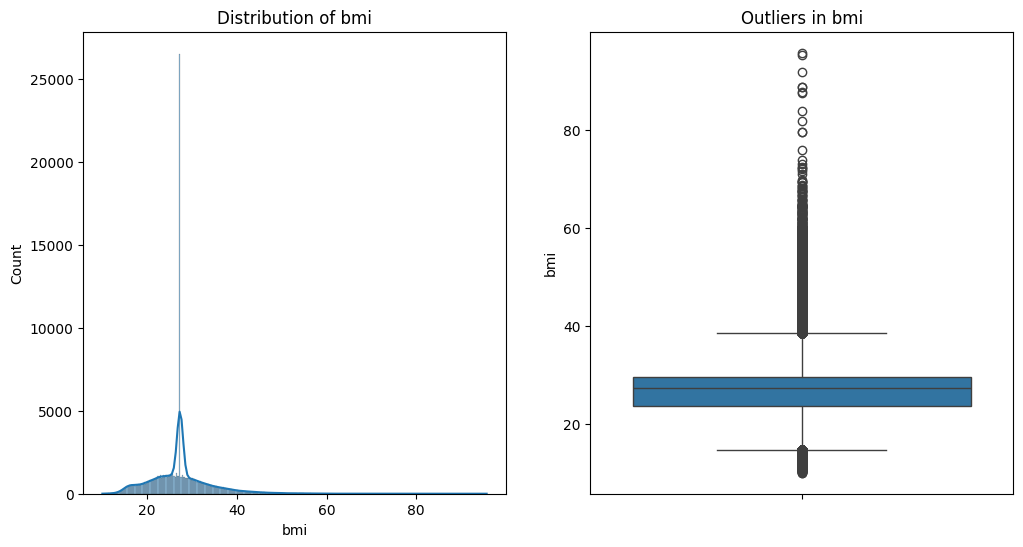

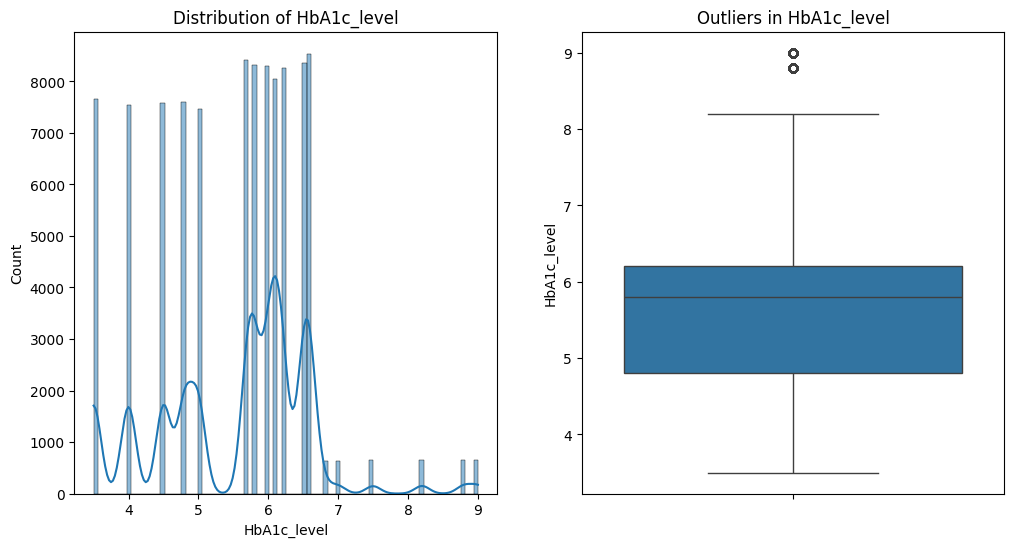

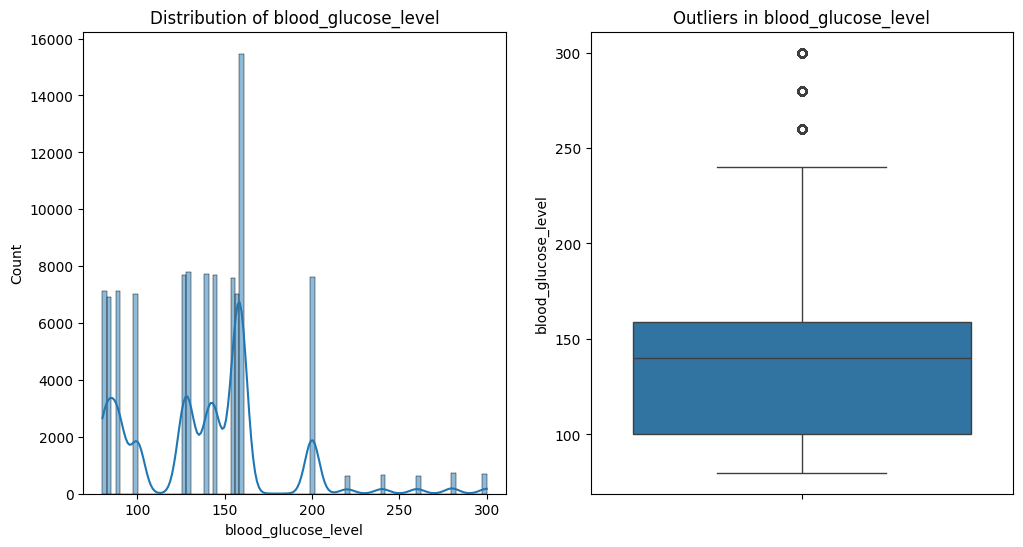

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
integer_columns = ['bmi','HbA1c_level','blood_glucose_level']

for column in integer_columns:
    data = diabetes_df.select(column).toPandas()

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(data[column], kde=True)
    plt.title(f"Distribution of {column}")

    plt.subplot(1, 2, 2)
    sns.boxplot(y=data[column])
    plt.title(f"Outliers in {column}")

    plt.show()



* BMI:
The distribution of BMI appears to be approximately normal, with a slight skew likely due to the presence of individuals capped at the age of 80, causing a spike at that age.
The interquartile range (IQR) of BMI spans from around 15 to 39 ages, indicating a wide range of BMI values among individuals in the dataset.

* HbA1C:
HbA1C levels are categorical with ordinal categories, showing higher counts at levels 6, 7, and 5.
There are some outliers present in the data.
The interquartile range (IQR) for HbA1C levels ranges from 5 to 6.6, indicating variability in long-term blood sugar control among individuals.

* Blood Glucose Level:
The distribution of blood glucose levels appears sporadic, with spikes observed at values around 90, 150, and 200.
These spikes may indicate clusters of individuals with blood glucose levels concentrated around these values.

In [29]:
from pyspark.sql.functions import corr

correlation = diabetes_df.corr('BMI', 'diabetes')

print("Correlation between BMI and diabetes status:", correlation)

Correlation between BMI and diabetes status: 0.2143574057995119


The positive correlation coefficient indicates that there is a positive relationship between BMI and diabetes status.
However, the correlation coefficient is relatively low, suggesting that the relationship between BMI and diabetes status is moderate.

In [33]:
from pyspark.sql.functions import avg

diabetes_count_by_gender = diabetes_df.groupBy('gender').agg((avg('diabetes')).alias('diabetes_proportion'))

diabetes_count_by_gender.show()


+------+-------------------+
|gender|diabetes_proportion|
+------+-------------------+
|Female| 0.0761886869790955|
| Other|                0.0|
|  Male|0.09748974173304369|
+------+-------------------+



Female: Approximately 7.62% of females in the dataset are diabetic patients.

Male: Around 9.75% of males in the dataset are diabetic patients.

Suggesting that males have a greater likelihood of being diagnosed with diabetes compared to females.

In [35]:
average_hba1c_diabetic = diabetes_df.filter(diabetes_df.diabetes == 1).agg(avg('HbA1c_level')).collect()[0][0]
average_hba1c_non_diabetic = diabetes_df.filter(diabetes_df.diabetes == 0).agg(avg('HbA1c_level')).collect()[0][0]

print(" HbA1c level for diabetic :", average_hba1c_diabetic)
print(" HbA1c level for non-diabetic :", average_hba1c_non_diabetic)

 HbA1c level for diabetic : 6.934952941176317
 HbA1c level for non-diabetic : 5.396760655736246


This significantly higher average HbA1c level among diabetic individuals suggests a positive association between elevated HbA1c levels and the likelihood of diabetes.

In [36]:
average_glucose_diabetic = diabetes_df.filter(diabetes_df.diabetes == 1).agg(avg('blood_glucose_level')).collect()[0][0]
average_glucose_non_diabetic = diabetes_df.filter(diabetes_df.diabetes == 0).agg(avg('blood_glucose_level')).collect()[0][0]

print("blood glucose level for diabetic :", average_glucose_diabetic)
print("blood glucose level for non-diabetic :", average_glucose_non_diabetic)

blood glucose level for diabetic : 194.09470588235294
blood glucose level for non-diabetic : 132.85246994535518


This significantly higher average fasting blood glucose level among diabetic individuals suggests a positive association between elevated blood glucose levels and the likelihood of diabetes.

In [8]:
from pyspark.sql.functions import col

for column in diabetes_df.columns:
    null_count = diabetes_df.filter(col(column).isNull()).count()
    print(f"Number of nulls in column {column}: {null_count}")

Number of nulls in column gender: 0
Number of nulls in column age: 0
Number of nulls in column hypertension: 0
Number of nulls in column heart_disease: 0
Number of nulls in column smoking_history: 0
Number of nulls in column bmi: 0
Number of nulls in column HbA1c_level: 0
Number of nulls in column blood_glucose_level: 0
Number of nulls in column diabetes: 0


NO null found in this dataset as its well preprocced before making it public.

In [9]:
cleaned_diabetes_df = diabetes_df.na.drop()

cleaned_count = cleaned_diabetes_df.count()
print(f"Row count after dropping nulls: {cleaned_count}")

Row count after dropping nulls: 100000


In [10]:
corrected_df = diabetes_df.filter((col("age") > 0) & (col("age") < 120))


# Section 3: Transform the clean data

10 points

Once you have clean data, start to prepare it to fit your analysis tools. This might mean using custom code to normalize certain values, joining supplemental datasets, and/or preparing it for machine learning.

### This section should include one or more of the following:
- Write a UDF to perform a function, then use it to add a new column to your data. Explain why in [markdown](https://www.markdownguide.org/cheat-sheet)
- Join an outside data source. (It can be one you've prepared alongside the primary source you're using, as long as you link it)
- Split the data into train/test sets
- Create vectors for relavent features
- One-hot encode catagorical variables

In [11]:
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType

def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal weight'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

bmi_category_udf = udf(bmi_category, StringType())
diabetes_df = diabetes_df.withColumn('BMICategory', bmi_category_udf('BMI'))



A UDF is created to categorize BMI values into four categories as per medical specs for these classes: Underweight, Normal weight, Overweight, and Obese. In hope that these medical defined classes can imporve final classification

The UDF is applied to the 'BMI' column to create a new column 'BMICategory' in the DataFrame. We will use this col in training the models.

In [12]:
from pyspark.sql.functions import udf
from pyspark.sql.types import IntegerType

smoking_history_map = {
    'not current': 3,
    'former': 2,
    'No Info': 0,
    'current': 4,
    'never': -2,
    'ever': -1
}

def smoking_history_weight(smoking_status):
    return smoking_history_map.get(smoking_status, None)

smoking_history_weight_udf = udf(smoking_history_weight, IntegerType())

diabetes_df = diabetes_df.withColumn('SmokingHistoryWeight', smoking_history_weight_udf('smoking_history'))



Similarly we are using UDF to label different smoking classes into ordinal number based on intution as eg: if someone never smoked would be -2 and someone is current smoker with 4 as highest . Here polarity does not make sense but order is important as ML model will understand correlation whether its positive or negative.

In [13]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder
from pyspark.ml import Pipeline


columns_to_ohe = ['BMICategory','gender']

stages = []

for categoricalCol in columns_to_ohe:
    stringIndexer = StringIndexer(inputCol=categoricalCol, outputCol=categoricalCol + "Index")
    oneHotEncoder = OneHotEncoder(inputCols=[stringIndexer.getOutputCol()], outputCols=[categoricalCol + "Vec"])
    stages += [stringIndexer, oneHotEncoder]

pipeline = Pipeline(stages=stages)

pipelineModel = pipeline.fit(diabetes_df)

diabetes_df_transformed = pipelineModel.transform(diabetes_df)





* Preparing categorical columns 'BMICategory' and 'gender' for machine learning by encoding them using StringIndexer and OneHotEncoder.
* This creates a Pipeline consisting of stages for each categorical column's encoding, fits the pipeline to the data, and transforms the DataFrame to produce the encoded features.

In [14]:
train_df, test_df = diabetes_df_transformed.randomSplit([0.8, 0.2], seed=13)


We  randomly split our data into 80:20 ratio for train:test data, to keep randomization consitent using seed as 13

# Section 4: Show your analysis of the data

10 points

This is where the science happens. Use your data to show some kind of insight, and how you got there. Make the reader understand why it's important, and how they can get the same conslusion, and/or what would need to change to reach a different one.

### This section should include one or more of the following:
- Fit the data to a model
- Show the outcome of clustering, regression, and/or classification algorithms.
 - We used several in class, but you can use whatever fits your needs for this assignment
- Reccomend a product/item
- Use a SQL query to filter results


In [16]:
from pyspark.ml.feature import VectorAssembler

inputCols = [
    'age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
    'blood_glucose_level', 'SmokingHistoryWeight', 'BMICategoryVec', 'genderVec'
]
assembler = VectorAssembler(inputCols=inputCols, outputCol="features")

train_df = assembler.transform(train_df).select("features", "diabetes")
test_df = assembler.transform(test_df).select("features", "diabetes")


- Utilizing VectorAssembler from PySpark ML, the code combines selected features into a single vector column named "features".
- It applies the assembler to both the training and test DataFrames, retaining only the "features" and "diabetes" columns for further analysis.

In [17]:
from pyspark.ml.classification import RandomForestClassifier, GBTClassifier, LogisticRegression, DecisionTreeClassifier, LinearSVC
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

models = {
    "Random Forest": RandomForestClassifier(featuresCol="features", labelCol="diabetes", numTrees=10),
    "Gradient-Boosted Trees": GBTClassifier(featuresCol="features", labelCol="diabetes"),
    "Logistic Regression": LogisticRegression(featuresCol="features", labelCol="diabetes"),
    "Decision Tree": DecisionTreeClassifier(featuresCol="features", labelCol="diabetes"),
    "Linear SVC": LinearSVC(featuresCol="features", labelCol="diabetes"),
}

accuracy_evaluator = MulticlassClassificationEvaluator(labelCol="diabetes", predictionCol="prediction", metricName="accuracy")
f1_evaluator = MulticlassClassificationEvaluator(labelCol="diabetes", predictionCol="prediction", metricName="f1")

for model_name, model in models.items():
    model_fit = model.fit(train_df)

    predictions = model_fit.transform(test_df)

    accuracy = accuracy_evaluator.evaluate(predictions)
    f1_score = f1_evaluator.evaluate(predictions)

    print(f"{model_name} Performance:")
    print(f"    Accuracy: {accuracy}")
    print(f"    F1 Score: {f1_score}\n")


Random Forest Performance:
    Accuracy: 0.9707290039800494
    F1 Score: 0.9680207974231904

Gradient-Boosted Trees Performance:
    Accuracy: 0.9707290039800494
    F1 Score: 0.9680207974231904

Logistic Regression Performance:
    Accuracy: 0.9591415184644063
    F1 Score: 0.9562141822821415

Decision Tree Performance:
    Accuracy: 0.9707290039800494
    F1 Score: 0.9680207974231904

Linear SVC Performance:
    Accuracy: 0.9600483651569348
    F1 Score: 0.9560848450822838



- using classification models including Random Forest, Gradient-Boosted Trees, Logistic Regression, Decision Tree, and Linear SVC. Tried to include most of available models in PySpark, hope this give baseline results. More python based models would be roburst like CatBoost, lightLGB and XGBoost.
- iterating over each model, fits it to the training data, makes predictions on the test data, and evaluates performance metrics such as accuracy and F1 score using MulticlassClassificationEvaluator.
- Performance metrics for each model, including accuracy and F1 score

Overall, all models performed well, with Random Forest, Gradient-Boosted Trees, and Decision Tree showing the highest accuracy and F1 score, followed closely by Logistic Regression and Linear SVC.

This classification of diabetes using machine learning models can offer numerous benefits to humanity:

- **Early Detection and Diagnosis:** Accurately predicting diabetes risk enables early identification of high-risk individuals, facilitating timely interventions such as lifestyle modifications and medical treatments. This early detection can help prevent or delay the onset of diabetes and its complications, improving patient outcomes and reducing healthcare costs.

- **Personalized Treatment Plans:** ML classification models enable personalized diabetes treatment plans by identifying individual risk factors. Tailored strategies improve condition management and enhance patient outcomes.

- **Preventive Healthcare Programs:** ML models help healthcare organizations pinpoint high-risk populations for diabetes, guiding targeted preventive programs. This data-driven approach reduces diabetes prevalence and fosters healthy lifestyle adoption within communities.